In [1]:
import duckdb
import pandas as pd
import geopandas as gpd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

path = "/home/etienne/projects/obsq/work/dev/data/data.duckdb"
target = 'expert_match'

pd.set_option('display.float_format', lambda x: '%.5f' % x)


In [2]:
table = 'combined'
schema = 'features'
con = duckdb.connect(path)
df = con.execute(f"""SELECT* FROM {schema}.{table}""" ).df()
#df = df.drop(columns= 'geom')
con.close()

In [3]:
df_pos = df[df['expert_match'] == 1]
df_neg = df[df['expert_match'] == 0]

In [4]:
def plot_mean_response(df, x):
    df.groupby(x)[target].mean().plot(kind="bar")
    plt.ylabel("P(y=1 | x)")
    plt.xlabel("x")
    plt.show()

In [5]:
def plot_3d_df(df):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    # 4. Plot the data using Matplotlib's 3D function
    # You can use a Seaborn color palette here as a colormap for the 'c' argument
    scatter = ax.scatter(df.iloc[:,0], df.iloc[:,1], df.iloc[:,2], 
                        
                        s=50) # 's' controls marker size
    ax.set_xlabel("pca_0")
    ax.set_ylabel("pca_1")
    ax.set_zlabel("pca_2")

In [6]:
def plot_cat_rate(df, cat_col):
    output = "home/etienne/projects/obsq/eda"
    rates = (
        df.groupby(cat_col)[target]
        .mean()
        .sort_values()
    )
    sns.barplot(x=rates.index[:20], y=rates.values[:20])
    plt.xticks(rotation=45, ha='right')   # or rotation=60, ha='right'
    plt.title(f"Observations rates for {cat_col}", fontsize=16)
    plt.savefig(f"{output}/{cat_col}_target_rates.jpg", dpi = 300, bbox_inches="tight")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36164 entries, 0 to 36163
Data columns (total 91 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   gbifID                              36164 non-null  int64  
 1   expert_match                        36164 non-null  int32  
 2   species                             36164 non-null  object 
 3   obsv_obs_count                      36164 non-null  int64  
 4   obsv_total_pct                      36164 non-null  float64
 5   obsv_expert_ids                     36164 non-null  int64  
 6   obsv_expert_ids_pct                 36164 non-null  float64
 7   obsv_avg_id_time                    36164 non-null  float64
 8   obsv_class_count                    36164 non-null  int64  
 9   obsv_order_count                    36164 non-null  int64  
 10  obsv_family_count                   36164 non-null  int64  
 11  obsv_genus_count                    36164

In [8]:
df.describe()

,gbifID,expert_match,obsv_obs_count,obsv_total_pct,obsv_expert_ids,obsv_expert_ids_pct,obsv_avg_id_time,obsv_class_count,obsv_order_count,obsv_family_count,...,bio13,bio14,bio15,bio16,bio17,bio18,bio19,elevation,landcover,spatial_cluster
count,36164.00000,36164.00000,36164.00000,36164.00000,36164.00000,36164.00000,36164.00000,36164.00000,36164.00000,36164.00000,...,36164.00000,36164.00000,36164.00000,36164.00000,36164.00000,36164.00000,36164.00000,36164.00000,36164.00000,36164.00000
mean,4625833303.41074,0.06675,549.06216,0.01381,15.11523,0.04766,23.23562,3.83182,23.53954,46.31935,...,110.86523,58.37405,17.30326,309.32228,196.81598,308.64119,216.35372,157.25852,10.15836,2.63287
std,701456912.79833,0.24959,963.06008,0.02423,23.56877,0.08744,47.54353,1.21487,11.87256,31.05942,...,9.19328,4.25502,2.30599,24.96314,11.55099,25.77209,16.08846,130.26964,5.62731,1.70762
min,3079585653.00000,0.00000,1.00000,0.00003,0.00000,0.00000,0.00000,1.00000,1.00000,1.00000,...,96.00000,46.00000,13.00000,268.00000,153.00000,264.00000,162.00000,2.00000,1.00000,0.00000
25%,4096659276.75000,0.00000,31.00000,0.00078,0.00000,0.00000,2.00000,3.00000,14.00000,18.00000,...,101.00000,56.00000,15.00000,282.00000,193.00000,281.00000,209.00000,44.00000,6.00000,1.00000
50%,4901366949.50000,0.00000,142.00000,0.00357,3.00000,0.01700,10.00000,4.00000,25.00000,44.00000,...,111.00000,58.00000,18.00000,309.00000,198.00000,309.00000,217.00000,128.00000,6.00000,3.00000
75%,5176584317.75000,0.00000,491.00000,0.01235,19.00000,0.05600,21.00000,5.00000,34.00000,73.00000,...,118.00000,61.00000,19.00000,330.00000,203.00000,330.00000,224.00000,241.00000,17.00000,4.00000
max,5868424872.00000,1.00000,3389.00000,0.08525,88.00000,1.00000,1455.00000,5.00000,39.00000,97.00000,...,145.00000,75.00000,23.00000,401.00000,255.00000,401.00000,275.00000,947.00000,18.00000,5.00000


In [9]:
df.var(numeric_only = True).sort_values(ascending=False)


gbifID                               492041800512569792.00000
histo_taxon_ttl_obs_count                       1707956.72674
obsv_obs_count                                   927484.71626
obsv_max_yearly_obs                              290170.49329
meta_coordinateUncertaintyInMeters               117994.80045
                                               ...           
meta_pheno_sex                                        0.00355
obsv_annot_meta_pct                                   0.00209
obsv_total_pct                                        0.00059
cmva_id_agree_rate                                    0.00031
obsv_sex_meta_pct                                     0.00019
Length: 89, dtype: float64

<Axes: >

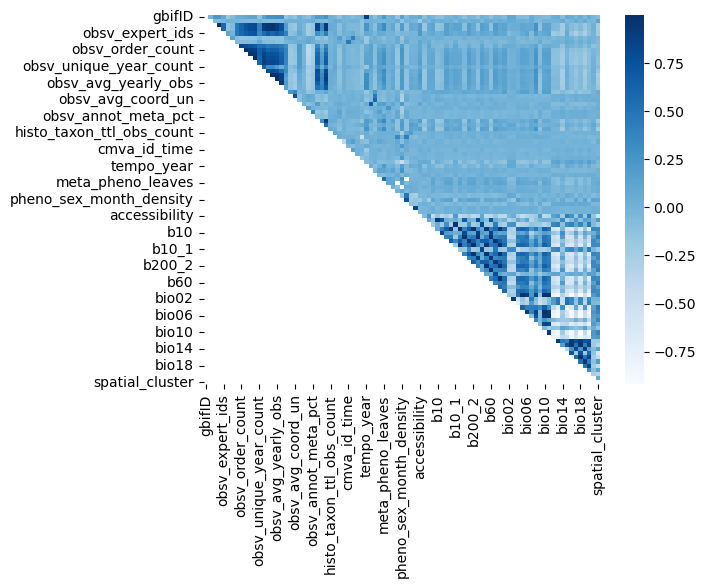

In [10]:
corr = df.corr(numeric_only=True)
upper_tri = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))

sns.heatmap(upper_tri, cmap='Blues',)

In [11]:
highly_correlated_pairs = upper_tri.stack().sort_values(ascending=False)
highly_correlated_pairs

obsv_obs_count    obsv_total_pct        1.00000
bio16             bio18                 0.99943
obsv_genus_count  obsv_species_count    0.99544
b0_2              b10_2                 0.99514
b100_2            b200_2                0.99333
                                         ...   
bio05             elevation            -0.89795
bio01             bio16                -0.89867
bio10             bio13                -0.90657
                  bio18                -0.91935
                  bio16                -0.92033
Length: 3913, dtype: float64

In [12]:
to_drop

['obsv_total_pct',
 'obsv_order_count',
 'obsv_family_count',
 'obsv_genus_count',
 'obsv_species_count',
 'obsv_unique_dates',
 'obsv_max_yearly_obs',
 'obsv_max_monthly_obs',
 'obsv_avg_yearly_obs',
 'obsv_avg_monthly_obs',
 'obsv_avg_descr_len',
 'obsv_max_species_obs_count',
 'tempo_year',
 'taxo_confusability_index',
 'b10',
 'b100',
 'b100_2',
 'b10_1',
 'b10_2',
 'b200',
 'b200_1',
 'b200_2',
 'b30',
 'b30_1',
 'b30_2',
 'b60',
 'b60_1',
 'b60_2',
 'bio03',
 'bio05',
 'bio06',
 'bio08',
 'bio10',
 'bio11',
 'bio12',
 'bio13',
 'bio16',
 'bio17',
 'bio18',
 'bio19',
 'elevation']

In [13]:
from sklearn.decomposition import PCA
obsv_cols = ['obsv_total_pct',
 'obsv_order_count',
 'obsv_family_count',
 'obsv_genus_count',
 'obsv_species_count',
 'obsv_unique_dates',
 'obsv_max_yearly_obs',
 'obsv_max_monthly_obs',
 'obsv_avg_yearly_obs',
 'obsv_avg_monthly_obs',
 'obsv_avg_descr_len',
 'obsv_max_species_obs_count']

bio_cols = ['bio03',
 'bio05',
 'bio06',
 'bio08',
 'bio10',
 'bio11',
 'bio12',
 'bio13',
 'bio16',
 'bio17',
 'bio18',
 'bio19']

gee_cols = ['b10',
 'b100',
 'b100_2',
 'b10_1',
 'b10_2',
 'b200',
 'b200_1',
 'b200_2',
 'b30',
 'b30_1',
 'b30_2',
 'b60',
 'b60_1',
 'b60_2']

df_obsv = df[obsv_cols]
df_bio = df[bio_cols]
df_gee = df[gee_cols]

pca_obsv = PCA(n_components=3, svd_solver = 'full')
pca_bio = PCA(n_components=3, svd_solver= 'full')
pca_gee = PCA(n_components=5, svd_solver= 'full')

df_obsv_pca = pd.DataFrame(pca_obsv.fit_transform(df_obsv)).rename(columns={0:'obsv_pca0', 1:'obsv_pca1', 2:'obsv_pca2' })
df_bio_pca = pd.DataFrame(pca_bio.fit_transform(df_bio)).rename(columns={0:'bio_pca0', 1:'bio_pca1', 2:'bio_pca2' })
df_gee_pca = pd.DataFrame(pca_gee.fit_transform(df_gee)).rename(columns={0:'gee_pca0', 1:'gee_pca1', 2:'gee_pca2' })

print(pca_obsv.explained_variance_ratio_, sum(pca_obsv.explained_variance_ratio_))
print(pca_bio.explained_variance_ratio_, sum(pca_bio.explained_variance_ratio_))
print(pca_gee.explained_variance_ratio_, sum(pca_gee.explained_variance_ratio_))



[0.95974739 0.0196846  0.0113233 ] 0.9907552911121617
[0.91484534 0.05700895 0.01800144] 0.9898557215497582
[0.62315977 0.23634752 0.09337412 0.01646885 0.01224616] 0.9815964249935689


In [14]:
columns = df.select_dtypes(include='number').columns.tolist()
print(len(columns))

strong_sep = []
moderate_sep = []
low_sep = []
skip = ['gbifID', 'expert_match']

for c in columns:
    if c in skip:
        continue 
    pos_mean = df_pos[c].mean()
    neg_mean = df_neg[c].mean()
    pos_std = df_pos[c].std()
    cohens_d = (pos_mean - neg_mean) / pos_std
    print(f"\n{c}: ", round(abs(cohens_d),3))
    if abs(cohens_d) > 0.5:
        print("  ✓ Strong separation - likely useful!")
        strong_sep.append(c)
    elif abs(cohens_d) > 0.2:
        print("  ⚠ Moderate separation - may be useful")
        moderate_sep.append(c)
    else:
        print("  ✗ Weak separation - may not help")
        low_sep.append(c)

89

obsv_obs_count:  0.469
  ⚠ Moderate separation - may be useful

obsv_total_pct:  0.469
  ⚠ Moderate separation - may be useful

obsv_expert_ids:  0.236
  ⚠ Moderate separation - may be useful

obsv_expert_ids_pct:  0.07
  ✗ Weak separation - may not help

obsv_avg_id_time:  0.022
  ✗ Weak separation - may not help

obsv_class_count:  0.068
  ✗ Weak separation - may not help

obsv_order_count:  0.221
  ⚠ Moderate separation - may be useful

obsv_family_count:  0.271
  ⚠ Moderate separation - may be useful

obsv_genus_count:  0.325
  ⚠ Moderate separation - may be useful

obsv_species_count:  0.325
  ⚠ Moderate separation - may be useful

obsv_unique_year_count:  0.131
  ✗ Weak separation - may not help

obsv_unique_dates:  0.367
  ⚠ Moderate separation - may be useful

obsv_max_yearly_obs:  0.473
  ⚠ Moderate separation - may be useful

obsv_max_monthly_obs:  0.463
  ⚠ Moderate separation - may be useful

obsv_avg_yearly_obs:  0.423
  ⚠ Moderate separation - may be useful

obsv_avg_

In [15]:
strong_sep

['obsv_avg_species_obs_count',
 'pheno_sex_month_density',
 'accessibility',
 'spatial_cluster']

In [16]:
print(len(moderate_sep))
moderate_sep

29


['obsv_obs_count',
 'obsv_total_pct',
 'obsv_expert_ids',
 'obsv_order_count',
 'obsv_family_count',
 'obsv_genus_count',
 'obsv_species_count',
 'obsv_unique_dates',
 'obsv_max_yearly_obs',
 'obsv_max_monthly_obs',
 'obsv_avg_yearly_obs',
 'obsv_avg_monthly_obs',
 'obsv_avg_descr_len',
 'obsv_max_species_obs_count',
 'histo_taxon_obs_month_density',
 'tempo_month',
 'b0_2',
 'b100_2',
 'b10_2',
 'b200_2',
 'b30_2',
 'b60_2',
 'bio02',
 'bio03',
 'bio07',
 'bio09',
 'bio14',
 'bio17',
 'bio19']

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import RocCurveDisplay, confusion_matrix, ConfusionMatrixDisplay, PrecisionRecallDisplay, precision_recall_curve
from sklearn.preprocessing import StandardScaler


In [18]:
scaler = StandardScaler()
col = strong_sep + moderate_sep
X = df[col].fillna(0)
y = df[target]
X


,obsv_avg_species_obs_count,pheno_sex_month_density,accessibility,spatial_cluster,obsv_obs_count,obsv_total_pct,obsv_expert_ids,obsv_order_count,obsv_family_count,obsv_genus_count,...,b200_2,b30_2,b60_2,bio02,bio03,bio07,bio09,bio14,bio17,bio19
0,9.63000,0.00000,35,1,3389,0.08525,38,39,97,244,...,60,56,58,109,26,419,-75,56,194,210
1,9.63000,0.00000,39,1,3389,0.08525,38,39,97,244,...,63,61,61,110,26,421,-74,55,193,208
2,1.94000,0.00000,21,5,330,0.00830,0,34,69,137,...,67,63,64,108,25,423,-74,61,201,222
3,1.11000,0.00000,34,1,21,0.00053,0,16,19,19,...,69,64,66,110,26,419,-70,54,186,201
4,9.63000,0.00000,39,1,3389,0.08525,38,39,97,244,...,60,58,59,110,26,416,-75,56,195,209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36159,1.40000,0.00000,0,5,126,0.00317,0,25,43,81,...,65,61,63,105,25,417,-68,61,200,220
36160,1.14000,0.33300,72,0,24,0.00060,0,8,12,19,...,55,52,54,102,25,406,-48,63,206,234
36161,3.47000,0.39100,8,5,990,0.02490,8,35,86,203,...,70,65,67,107,25,420,-71,60,198,218
36162,3.47000,0.04500,7,5,990,0.02490,8,35,86,203,...,70,66,67,107,25,420,-71,60,197,218


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
n_samples = len(y_train)
n_pos = y_train.sum()
n_neg = n_samples - n_pos
scale_pos_weight = n_neg / n_pos

In [20]:
model = LogisticRegression(solver='liblinear', class_weight='balanced',max_iter=1000, random_state=0) # 'lbfgs' is default in newer versions



In [21]:
model = RandomForestClassifier(
                n_estimators=100,
                class_weight='balanced',
                max_depth=10,
                random_state=42,
                n_jobs=-1
            )

In [22]:
model = XGBClassifier(
                n_estimators=100,
                max_depth=6,
                scale_pos_weight=scale_pos_weight,
                learning_rate=0.1,
                random_state=42,
                eval_metric='logloss')


In [23]:
model.fit(X_train_scaled, y_train)

,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'binary:logistic'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,None
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes 

In [24]:
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)

# Evaluate the model (e.g., accuracy, confusion matrix, classification report)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", metrics.confusion_matrix(y_test, y_pred))
print("Classification Report:\n", metrics.classification_report(y_test, y_pred))

Accuracy: 0.8379604026103307
Confusion Matrix:
 [[7096 1341]
 [ 124  480]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.84      0.91      8437
           1       0.26      0.79      0.40       604

    accuracy                           0.84      9041
   macro avg       0.62      0.82      0.65      9041
weighted avg       0.93      0.84      0.87      9041



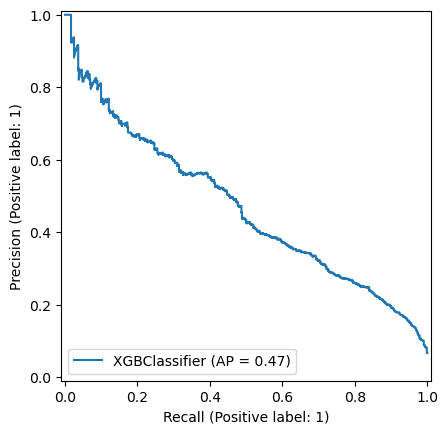

In [25]:
precision, recall, _ = precision_recall_curve(y_test, y_pred)
PrecisionRecallDisplay.from_estimator(
   model, X_test_scaled, y_test)

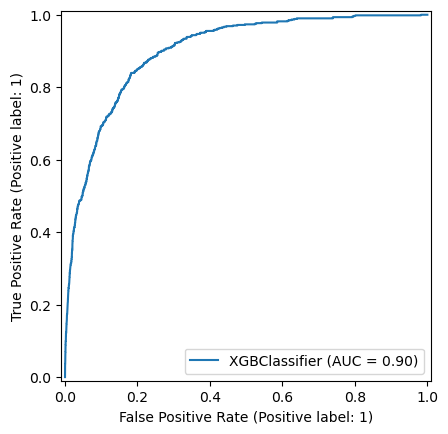

In [26]:
RocCurveDisplay.from_estimator(model, X_test_scaled, y_test)

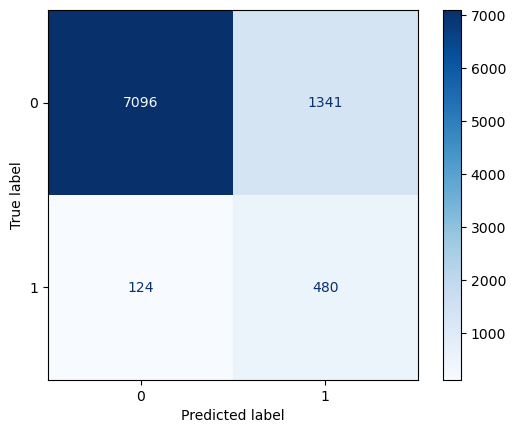

In [27]:
y_pred = model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot(cmap='Blues')